In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
assert hasattr(tf, 'function')

## Load dataset MNIST

In [3]:
#LOAD FASHIONMNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
#Load images and targets
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

images = images[:10000]
targets = targets[:10000]

#Flatten 
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.fit_transform(images_test)

images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

#print(images.mean())
#print(targets.std())

#print(images.shape)
#print(targets.shape)

#print(images[0])
#print(targets[0])

(8000, 784) (8000,)
(2000, 784) (2000,)


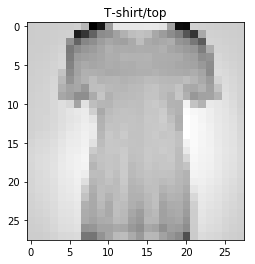

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Saandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Plot Image
plt.imshow(np.reshape(images[10], (28, 28)), cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

# CREATE MODEL

In [18]:
model = tf.keras.models.Sequential()

#Opération d'applatissement de l'image avec flatten
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

print("Shape of the image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the message after the Flatten", model_output.shape)

Shape of the image (1, 784)
Shape of the message after the Flatten (1, 784)


# AJOUT DES LAYERS

In [19]:
#Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

#Ajout de layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print( model_output, targets[0:1])


[[0.07777978 0.11220729 0.03361129 0.10215214 0.00577518 0.19930193
  0.17009251 0.20529525 0.06667136 0.02711316]] [9]


  # Model Summary

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  200960    
_________________________________________________________________
dense_7 (Dense)              multiple                  32896     
_________________________________________________________________
dense_8 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Compiler le model

In [21]:
# Minimisation de l'erreur
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# TRAIN THE MODEL

In [22]:
history = model.fit(images_train, targets_train, epochs=50, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 1s 159us/sample - loss: 1.9083 - accuracy: 0.3484 - val_loss: 1.4856 - val_accuracy: 0.5456
Epoch 2/50
6400/6400 [==============================] - 1s 95us/sample - loss: 1.2883 - accuracy: 0.6120 - val_loss: 1.1544 - val_accuracy: 0.6513
Epoch 3/50
6400/6400 [==============================] - 1s 97us/sample - loss: 1.0472 - accuracy: 0.6808 - val_loss: 0.9940 - val_accuracy: 0.6956
Epoch 4/50
6400/6400 [==============================] - 1s 97us/sample - loss: 0.9161 - accuracy: 0.7120 - val_loss: 0.8968 - val_accuracy: 0.7175
Epoch 5/50
6400/6400 [==============================] - 1s 91us/sample - loss: 0.8314 - accuracy: 0.7352 - val_loss: 0.8317 - val_accuracy: 0.7337
Epoch 6/50
6400/6400 [==============================] - 1s 93us/sample - loss: 0.7709 - accuracy: 0.7508 - val_loss: 0.7840 - val_accuracy: 0.7462
Epoch 7/50
6400/6400 [==============================] - 1s 91us/sampl

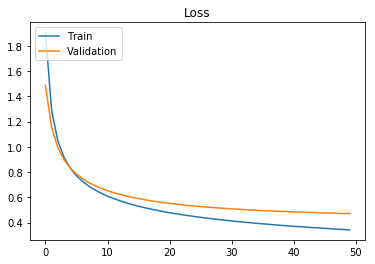

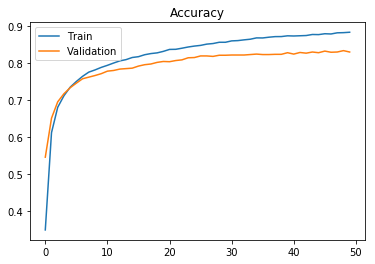

In [24]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [25]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2000/2000 [==============================] - 0s 45us/sample - loss: 0.4730 - accuracy: 0.8370
Test Loss 0.47302536725997923
Test Accuracy 0.837


## Sauvegarder le modèle

In [5]:
#model.save('simple_nn.h5')

#Load model
loaded_model= tf.keras.models.load_model('simple_nn.h5')
print(loaded_model.predict(images_test[0:1]), targets_test[0:1])
#loss, acc = loaded_model.evaluate(images_test, targets_test)
#print('Loss', loss)
#print('Accuracy', acc)

[[1.2511560e-03 9.9087781e-01 2.1927655e-04 6.9452240e-03 2.4472032e-04
  2.4823046e-05 1.3566379e-04 4.3572829e-05 2.5066684e-04 7.1045602e-06]] [1]
